In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [3]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving path_to_your_image.png to path_to_your_image.png


In [4]:
model = MobileNetV2(weights='imagenet')
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


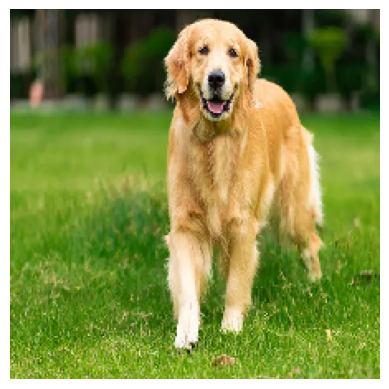

Predictions:
1. golden_retriever: 94.35%
2. Leonberg: 0.38%
3. Saluki: 0.37%


In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()

print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score*100:.2f}%")
